# Visualize Activations in Conv Layers
## Adam Optimizer, Dropout 0.2, Batch Normalization, Data Augmentation, Xavier Initialization, Learning Rate Scheduler (Reduce Learning Rate on Plateau)

In [1]:
import torch
from model_utils import TrafficSignsConvNet
from training_utils import load_checkpoint
import matplotlib.pyplot as plt
from data_utils import TrafficSignsDataset

AttributeError: 'property' object has no attribute '__name__'

In [ ]:
data_dir = 'data/gtsrb-german-traffic-sign/Train'
ckpt_path = 'models/adam_batchnorm_dataaug_xavier_lrscheduler_dropout0.2/best.pt'
num_classes = 5
use_batch_norm = True

In [ ]:
# set device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'device: {device}')

# model
model = TrafficSignsConvNet(
    num_classes=num_classes,
    batch_norm=use_batch_norm
)

# transfer model to device
model = model.to(device)

# load checkpoint
print(f'loading checkpoint {ckpt_path}')
state = load_checkpoint(ckpt_path, model, device=device)

# set to eval mode
model.eval()

In [ ]:
imagepaths = ['data/gtsrb-german-traffic-sign/Train/14/00014_00000_00022.png',
              'data/gtsrb-german-traffic-sign/Train/18/00018_00000_00022.png']


In [ ]:
# preprocess and convert to tensor
dataset = TrafficSignsDataset(filepaths=imagepaths)

In [2]:
x, label = dataset[0]

NameError: name 'dataset' is not defined

In [3]:
# add batch dim
x = x.unsqueeze(0)

NameError: name 'x' is not defined

In [29]:
# pass through network
if use_batch_norm:
    out1 = model.batchnorm1(model.dropout1(model.pool1(model.relu1(model.conv1(x)))))
    out2 = model.batchnorm2(model.dropout2(model.pool2(model.relu2(model.conv2(out1)))))
    out3 = model.batchnorm3(model.dropout3(model.pool3(model.relu3(model.conv3(out2)))))
    out4 = model.batchnorm4(model.dropout4(model.pool4(model.relu4(model.conv4(out3)))))
else:
    out1 = model.dropout1(model.pool1(model.relu1(model.conv1(x))))
    out2 = model.dropout2(model.pool2(model.relu2(model.conv2(out1))))
    out3 = model.dropout3(model.pool3(model.relu3(model.conv3(out2))))
    out4 = model.dropout4(model.pool4(model.relu4(model.conv4(out3))))

In [30]:
# shape of tensors after passing through conv layers
print(out1.shape)
print(out2.shape)
print(out3.shape)
print(out4.shape)

torch.Size([1, 6, 62, 62])
torch.Size([1, 12, 29, 29])
torch.Size([1, 18, 12, 12])
torch.Size([1, 24, 4, 4])


In [31]:
# plot
def plot_activations(tensor):
    out = tensor.data.numpy()
    num_filters = out.shape[1]
    fig, axs = plt.subplots(
        nrows=1,
        ncols=num_filters,
        figsize=(10, 10),
        dpi=160
    )
    for filter_id in range(num_filters):
        axs[filter_id].imshow(out[0, filter_id])
        axs[filter_id].axis('off')
        axs[filter_id].set_aspect('equal')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.tight_layout()
    plt.show()

## Activations After Convolutional Layer 1

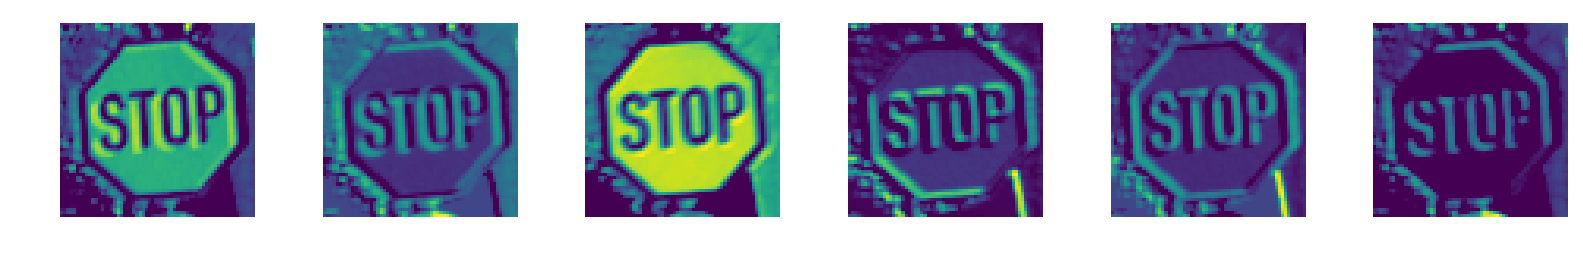

In [32]:
plot_activations(out1)

## Activations After Convolutional Layer 2

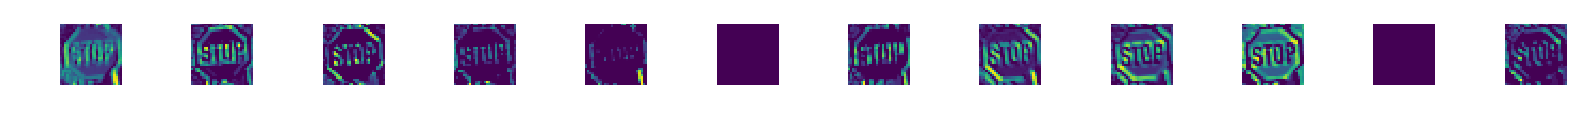

In [33]:
plot_activations(out2)

## Activations After Convolutional Layer 3

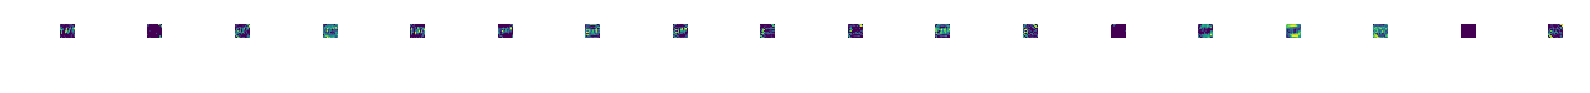

In [34]:
plot_activations(out3)

## Activations After Convolutional Layer 4

c:\users\subhadarshi\pycharmprojects\pytorch\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


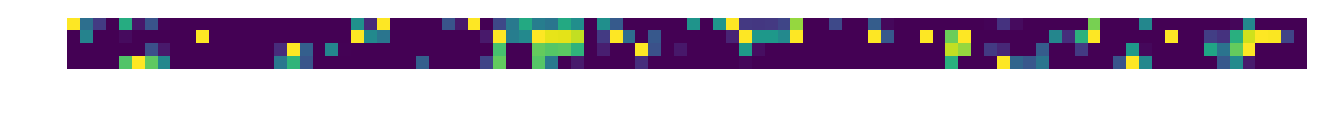

In [35]:
plot_activations(out4)

In [36]:
x, label = dataset[1]

In [37]:
# add batch dim
x = x.unsqueeze(0)

In [38]:
# pass through network
if use_batch_norm:
    out1 = model.batchnorm1(model.dropout1(model.pool1(model.relu1(model.conv1(x)))))
    out2 = model.batchnorm2(model.dropout2(model.pool2(model.relu2(model.conv2(out1)))))
    out3 = model.batchnorm3(model.dropout3(model.pool3(model.relu3(model.conv3(out2)))))
    out4 = model.batchnorm4(model.dropout4(model.pool4(model.relu4(model.conv4(out3)))))
else:
    out1 = model.dropout1(model.pool1(model.relu1(model.conv1(x))))
    out2 = model.dropout2(model.pool2(model.relu2(model.conv2(out1))))
    out3 = model.dropout3(model.pool3(model.relu3(model.conv3(out2))))
    out4 = model.dropout4(model.pool4(model.relu4(model.conv4(out3))))

In [39]:
# shape of tensors after passing through conv layers
print(out1.shape)
print(out2.shape)
print(out3.shape)
print(out4.shape)

torch.Size([1, 6, 62, 62])
torch.Size([1, 12, 29, 29])
torch.Size([1, 18, 12, 12])
torch.Size([1, 24, 4, 4])


## Activations After Convolutional Layer 1

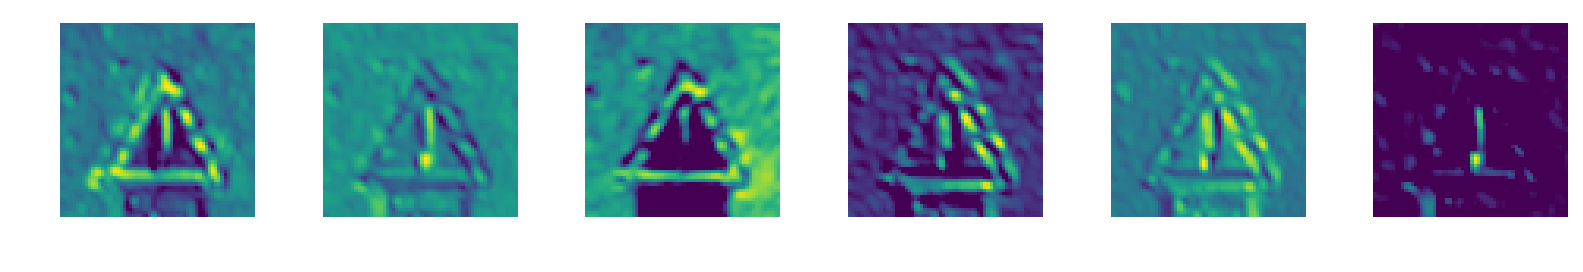

In [40]:
plot_activations(out1)

## Activations After Convolutional Layer 2

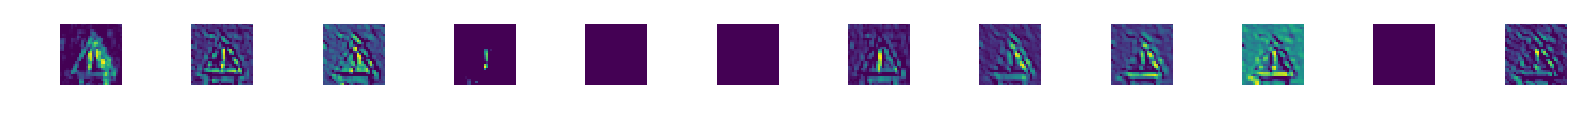

In [41]:
plot_activations(out2)

## Activations After Convolutional Layer 3

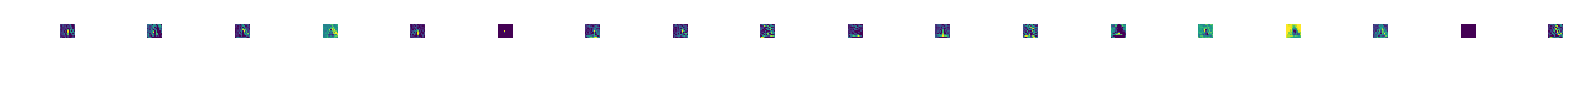

In [42]:
plot_activations(out3)

## Activations After Convolutional Layer 4

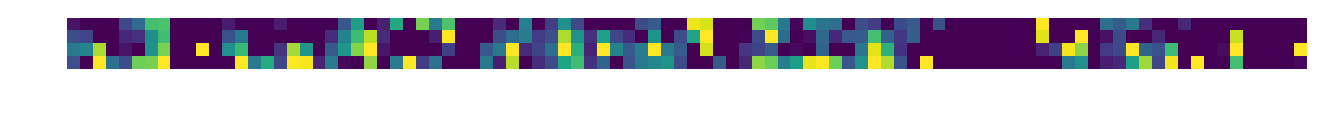

In [43]:
plot_activations(out4)